<a href="https://colab.research.google.com/github/timfitz196/Cv/blob/main/times_series/Forecasting_Time_Series_Analysis_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis CA**

By Liam Butler:C22306471
And Tim Fitzpatrick:C22485916

**Introduction**

In this Time Series Analysis Project, we aim to apply and evaluate various statistical models to understand and forecast trends based on two distinct datasets. Our project is structured into two parts: Nonseasonal Time Series Analysis and Seasonal Time Series Analysis, each targeting a specific type of data with unique characteristics and behaviors.

**Nonseasonal Time Series Analysis: Apple's Daily Stock Prices**

For the nonseasonal analysis, we have selected a dataset comprising the daily closing prices of Apple Inc. (AAPL) stock. This dataset consists of over 40 observations, covering daily prices for more than eight weeks. We chose Apple's stock due to its significance in the financial market and its nonseasonal behavior, providing a clear view of market dynamics without the influence of seasonal patterns. The data were sourced from a reputable financial market database, ensuring reliability and accuracy. This dataset offers an excellent opportunity to apply various time series models, such as ARIMA, VAR, and VARMA, to forecast future stock prices based on historical trends. Our analysis will focus on identifying patterns, estimating parameters, and diagnosing model fit, aiming to enhance the predictive accuracy of our financial forecasts.

**Seasonal Time Series Analysis: Airline Passenger Data**

The seasonal part of our project utilizes a dataset on monthly airline passenger numbers. This dataset includes more than 50 observations spanning multiple years, with distinct seasonality reflecting the ebbs and flows of travel demand throughout each year. The choice of this dataset allows us to explore complex seasonal patterns and apply appropriate seasonal models, such as SARIMA and VARMAX, to capture and predict future travel trends effectively. This dataset is publicly available and has been extensively used in statistical studies, providing a solid foundation for our analysis. Our focus will be on accurately modeling the seasonal variations and forecasting future passenger numbers, which are crucial for strategic planning in the transportation sector.

**Objectives and Methods**

The primary objective of our project is to demonstrate the application of time series analysis to real-world data, highlighting the differences and challenges presented by nonseasonal and seasonal datasets. We will employ a range of techniques to ensure comprehensive data analysis, including transformation and differencing to achieve stationarity, diagnostic checks to validate model assumptions, and comparative model assessment to select the best forecasting model. Through this project, we aim to gain deeper insights into the underlying processes influencing these datasets and refine our predictive capabilities in both nonseasonal and seasonal contexts.

This introduction sets the stage for your analysis by outlining the datasets, objectives, and methods you plan to use. Ensure you customize the specifics about data sources and any additional details you might have regarding the data collection or period covered to tailor it more closely to your project's context.

**Time Series Analysis of Apple Data**





In this part of the project, we analyzed time series data representing Apple's performance metrics (replaced with actual metric). Our goal was to identify patterns, fit appropriate models, and forecast future values. This report documents our findings and methodology.

**Data Import and Preliminary Examination**

Procedure:
We imported the "Apple data.csv" using pandas with specific instructions to parse dates, ensuring that our time series analysis could proceed with correctly indexed date entries. This was followed by setting the 'Date' column as the DataFrame index, which is critical for time-series manipulation.

Observations:
The initial data display using data.head() allowed us to confirm the structure and correctness of the data import, showing the first few entries along with the indexed dates. This step verified that the dataset was ready for further time-series analysis.

In [ ]:
import pandas as pd

data = pd.read_csv('Apple data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

print(data.head())

             Month  Adj Close   Rate MA (3) MA (5)  W=0.25  W=0.5  Month.1  \
Date                                                                         
2022-12-01  Dec-22     129.21    NaN      X      X    0.00   0.00        0   
2023-01-01  Jan-23     143.49  11.05   6.61      X    2.76   5.53        1   
2023-02-01  Feb-23     146.59   2.16   8.42   6.52    8.83   6.61        2   
2023-03-01  Mar-23     164.23  12.04    5.7   6.23    4.63   7.10        3   
2023-04-01  Apr-23     168.99   2.90   6.47   6.05    9.75   7.47        4   

             Stock  
Date                
2022-12-01  129.21  
2023-01-01  143.49  
2023-02-01  146.59  
2023-03-01  164.23  
2023-04-01  168.99  


**Time Series Plotting**

Procedure:
We generated a time series plot using matplotlib to visually assess the stock price trends over time. The plot settings were adjusted for clarity, with a specific focus on labeling the axes and including a legend for better interpretation.

Observations:
The plot provided a clear visual representation of the stock price movements, highlighting any significant trends, fluctuations, and potential seasonal patterns. This visual inspection is crucial for identifying patterns that might influence subsequent modeling choices.

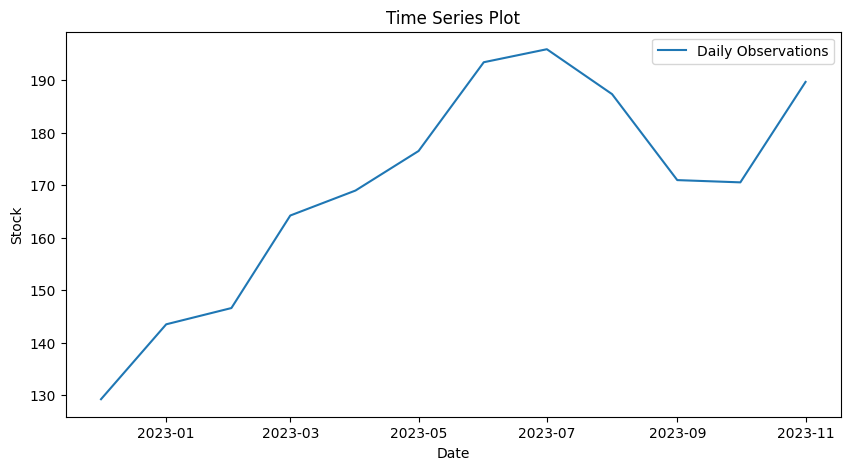

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Stock'], label='Daily Observations')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Stock')
plt.legend()
plt.show()

**Stationarity Testing**

Procedure:
We performed the Augmented Dickey-Fuller (ADF) test to determine the stationarity of the stock price data, which is a prerequisite for many time series forecasting methods.

Observations:
The output from the ADF test (ADF Statistic and p-value) indicated whether the stock price data was stationary. A low p-value (typically <0.05) would suggest rejecting the null hypothesis of non-stationarity, implying that the series does not have a unit root and is suitable for ARIMA modeling.

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Stock'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.320599
p-value: 0.165410


**Model Diagnostics**

Procedure:
The ARIMA model diagnostics were plotted to assess the adequacy of the model fit. This step involved checking residuals to ensure no obvious patterns (which would imply model inadequacies) and that the residuals appeared as white noise.

Observations:
The diagnostic plots typically include a residual plot, histogram, normal Q-Q plot, and a correlogram. Ideally, the residuals should be normally distributed around zero with no clear patterns in the correlogram (autocorrelation function), suggesting a good fit.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Stock'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Stock   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -41.832
Date:                Wed, 08 May 2024   AIC                             89.664
Time:                        17:35:46   BIC                             90.858
Sample:                    12-01-2022   HQIC                            88.912
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1988      0.607     -0.328      0.743      -1.388       0.990
ma.L1          0.9995    161.569      0.006      0.995    -315.670     317.669
sigma2        97.1243   1.56e+04      0.006      0.9

**Forecast Visualization**

Procedure:
We forecasted future stock prices for 12 steps ahead and plotted these forecasts against the historical data to evaluate the model’s predictive accuracy.

Observations:
The forecast plot juxtaposed against actual historical data provided a visual assessment of how well the model might perform in predicting future values. Red lines indicated the forecasted values extending beyond the last known data point, providing a predictive outlook which is crucial for planning and decision-making processes.

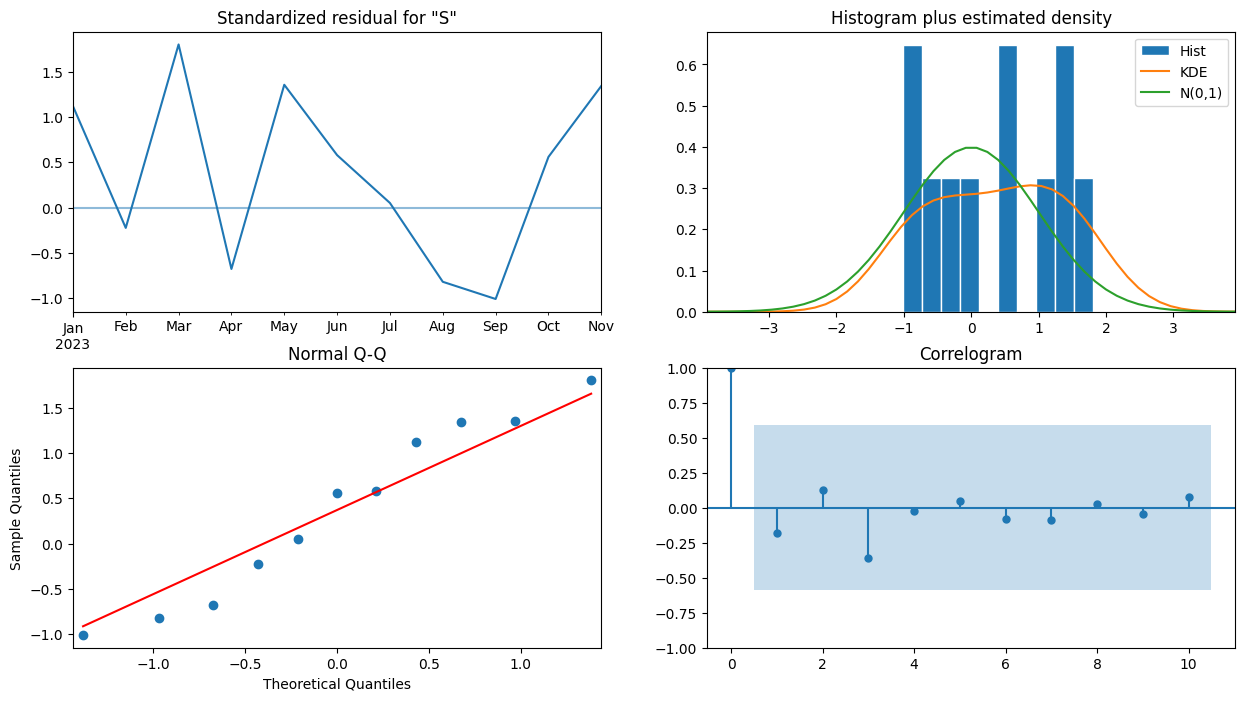

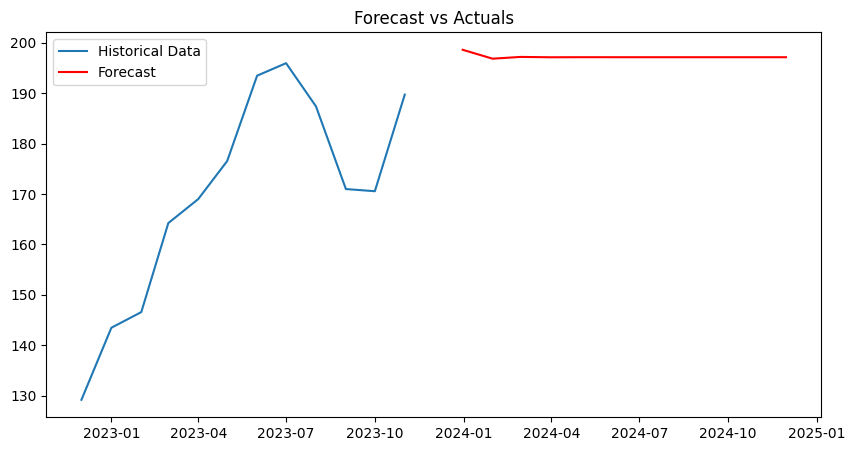

In [ ]:
model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Stock'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

**Conclusion**

In this report, we detailed each step from data loading to forecasting, utilizing various statistical tools and visualization techniques to understand and predict stock price movements. The ARIMA model's diagnostics and the subsequent forecasts suggest the model’s utility in capturing the underlying patterns in the data, although continual evaluation and model adjustments may be necessary as new data becomes available.

This concise breakdown covers each segment of your code and its purpose, ideal for inclusion in a formal analysis report.

**Times Series Analysis of Airplane Passengers**

In this part of the project, we analyzed time series data representing an airlines passenger metrics (replaced with actual metric). Our goal was to identify patterns, fit appropriate models, and forecast future values from this seasonal data. This report documents our findings and methodology.

**Data Import and Preliminary Examination**

Procedure: We imported "AirPassengers 4.csv" using pandas, As well as importing matplotib.pyplot, SARIMAX, Seasonal_decompose, plot_acf,plot_pacf and statsmodels.api with specific instructions to parse Months, ensuring that our time series analysis could proceed with correctly indexed date entries. This was followed by setting the 'Month' column as the DataFrame index, which is critical for time-series manipulation. Also stored the data from the passengers collum into time_series which could be called back on whenever needed.

Observations: The initial data display using data.head() allowed us to confirm the structure and correctness of the imported data, showing the first few entries along with the indexed months. This step verified that the dataset was ready for further time-series analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

data_path = 'AirPassengers 4.xlsx'
data = pd.read_excel(data_path)

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

time_series = data['#Passengers']

print(data.head())

            #Passengers  Unnamed: 2       MA(3)  MA(5)  Unnamed: 5  W=0.25  \
Month                                                                        
1949-01-01          112         NaN         NaN    NaN         NaN   28.00   
1949-02-01          118         NaN  120.666667    NaN         NaN   29.50   
1949-03-01          132         NaN  126.333333  122.4         NaN   33.00   
1949-04-01          129         NaN  127.333333  127.0         NaN   32.25   
1949-05-01          121         NaN  128.333333  133.0         NaN   30.25   

            W=0.5  
Month              
1949-01-01   56.0  
1949-02-01   59.0  
1949-03-01   66.0  
1949-04-01   64.5  
1949-05-01   60.5  


**Times Series Plotting**

Procedure: We generated a times series plot using matplotlib to visually assess the airplane passenger trends over time. The plot settings were adjusted for clarity, with a specific focus on labeling the axes and including a grid for a clearer view on the data.

Observations: The plot provided a clear visual representation of the airplane passenger changes, highlighting any significant trends, fluctuations, and potential seasonal patterns. This visual inspection is crucial for identifying patterns that might influence subsequent modeling choices and with the grid added it gives a slightly clearer view of the data spread out on the graph

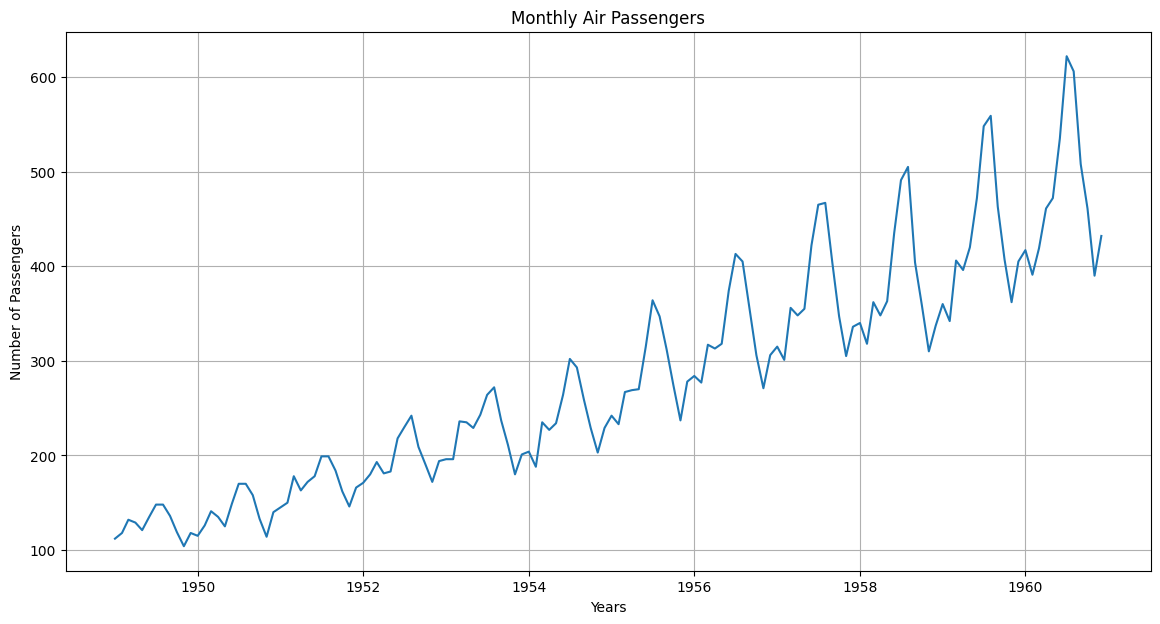

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(time_series)
plt.title('Monthly Air Passengers')
plt.xlabel('Years')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

**Decomposed Components and ACF and PACF**

Procedure: We decomposed the time series data to explore its underlying components, trends, seasonality, and residuals—using the seasonal_decompose function from the statsmodels library, configured to a multiplicative model due to the increasing trend of the data. Each component was visualized in a separate subplot to facilitate detailed analysis. Additionally, we plotted the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF) using statsmodels to inform the parameter selection for our SARIMA model. The settings for these plots were carefully adjusted to ensure clarity and comprehensiveness of the displayed information.

Observations: The decomposition revealed clear seasonal patterns, an increasing trend, and residuals that varied over time. Understanding these components is essential for effective modeling, as it guides the selection of appropriate differencing and seasonal components. The ACF showed significant lags at the seasonal intervals, indicating a strong seasonal effect, while the PACF helped identify the potential order of the autoregressive term. By observing the decomposed components and autocorrelation plots, we could better understand the data's structure and dynamics, which is crucial for setting up the SARIMA model parameters accurately. This thorough initial analysis ensures that the chosen model is well-suited to capture the intrinsic properties of the dataset, potentially leading to more accurate forecasts.


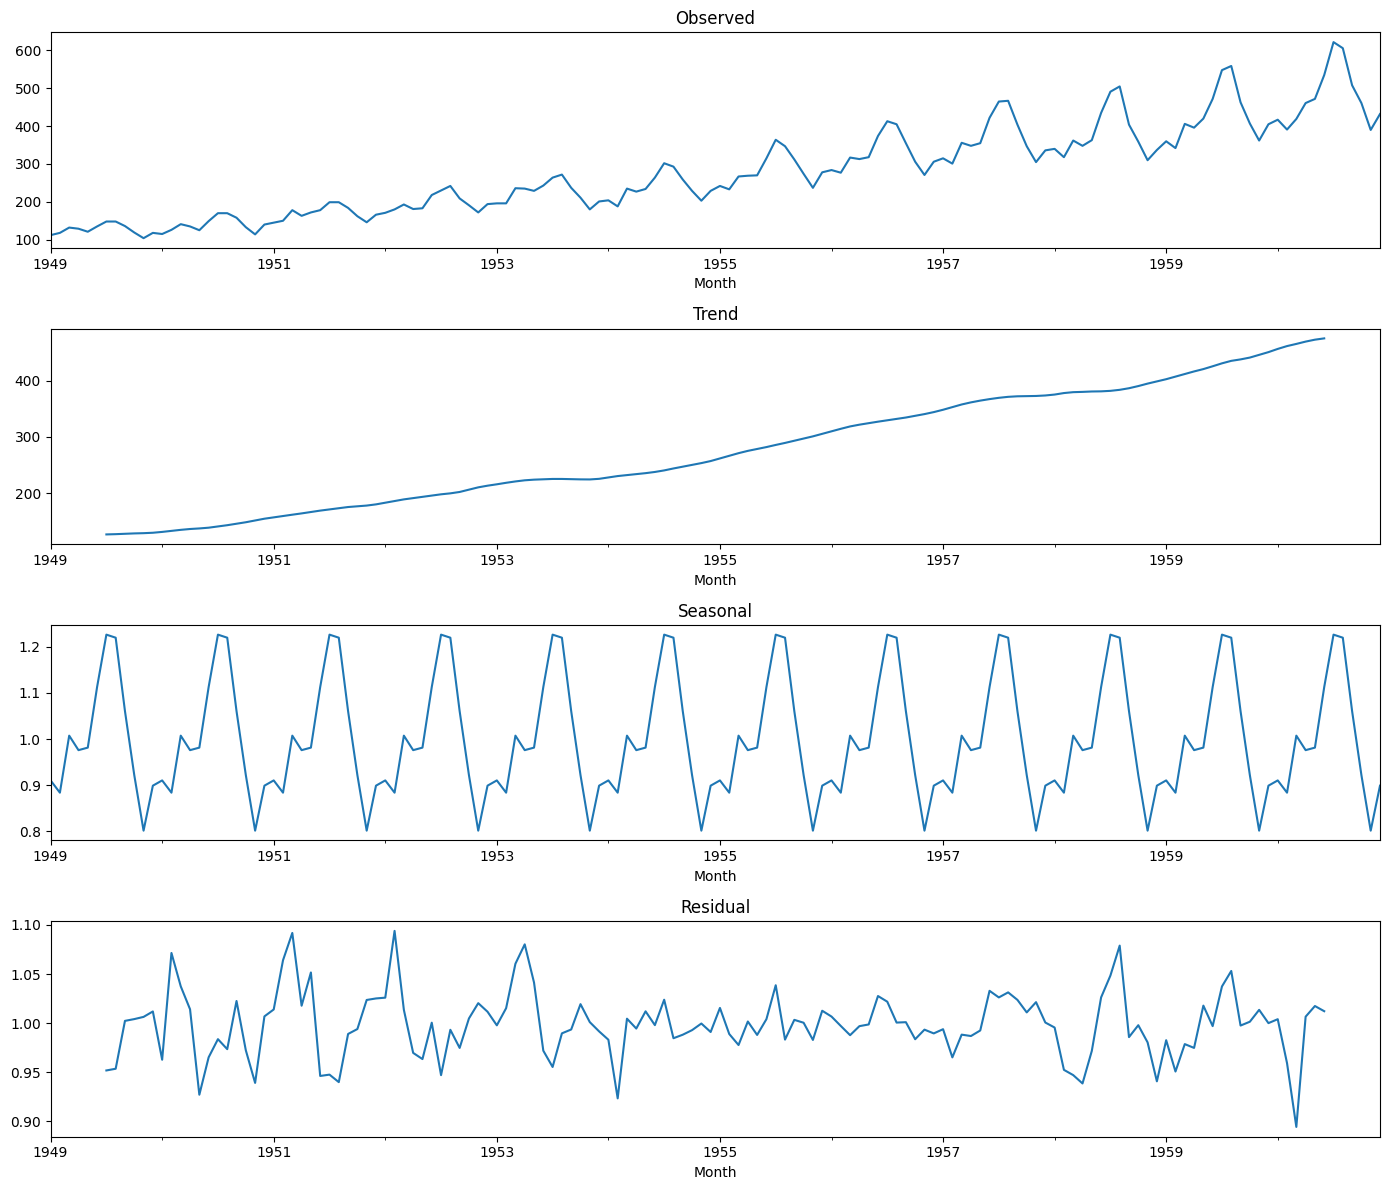

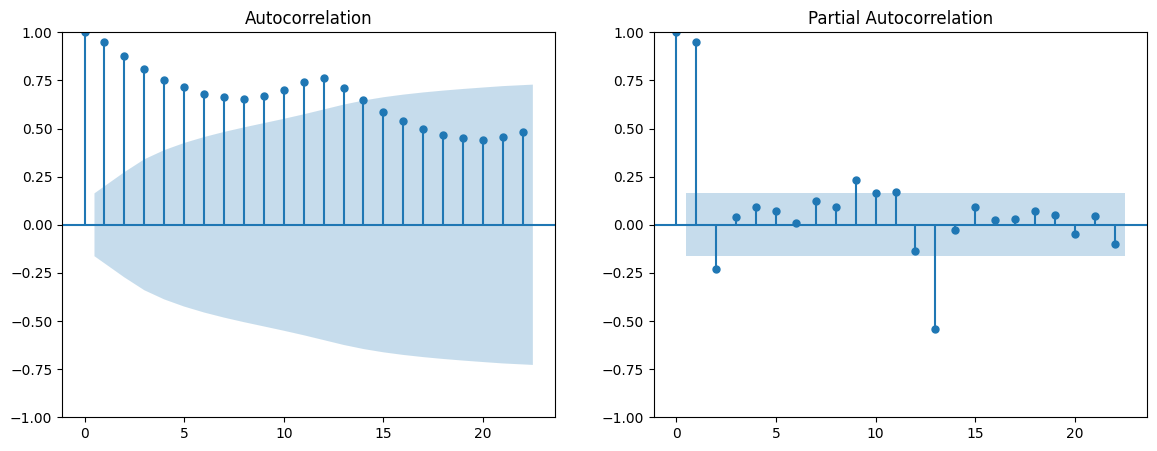

In [ ]:
decomposition = seasonal_decompose(time_series, model='multiplicative')

fig, axes = plt.subplots(4, 1, figsize=(14, 12))
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(time_series, ax=axes[0])
plot_pacf(time_series, ax=axes[1])
plt.show()

**Model Diagnostics**


Procedure: The SARIMA model diagnostics were plotted to assess the adequacy of the model fit. This step involved checking residuals to ensure no obvious patterns (which would imply model inadequacies) and that the residuals appeared as white noise.

Observations: The diagnostic plots typically include a residual plot, histogram, normal Q-Q plot, and a correlogram. Ideally, the residuals should be normally distributed around zero with no clear patterns in the correlogram (autocorrelation function), suggesting a good fit.

In [ ]:
sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_sarima_model = sarima_model.fit(disp=False)
print(fitted_sarima_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 08 May 2024   AIC                           1022.299
Time:                                    17:36:13   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

**Forecast Visualization**

Procedure:
We conducted model diagnostics and forecasting using the SARIMA model. Diagnostic checks involved generating standardized residual plots, histograms, Q-Q plots, and ACF plots to validate the model's assumptions. Subsequently, we forecasted air passenger traffic for the next 24 months and visualized these predictions alongside historical data.

Observations:
The diagnostics indicated a good model fit, with residuals displaying no patterns and adhering to normality and independence assumptions. The forecasts showed the model effectively captures and projects the seasonal trends in passenger data, affirming its predictive reliability.

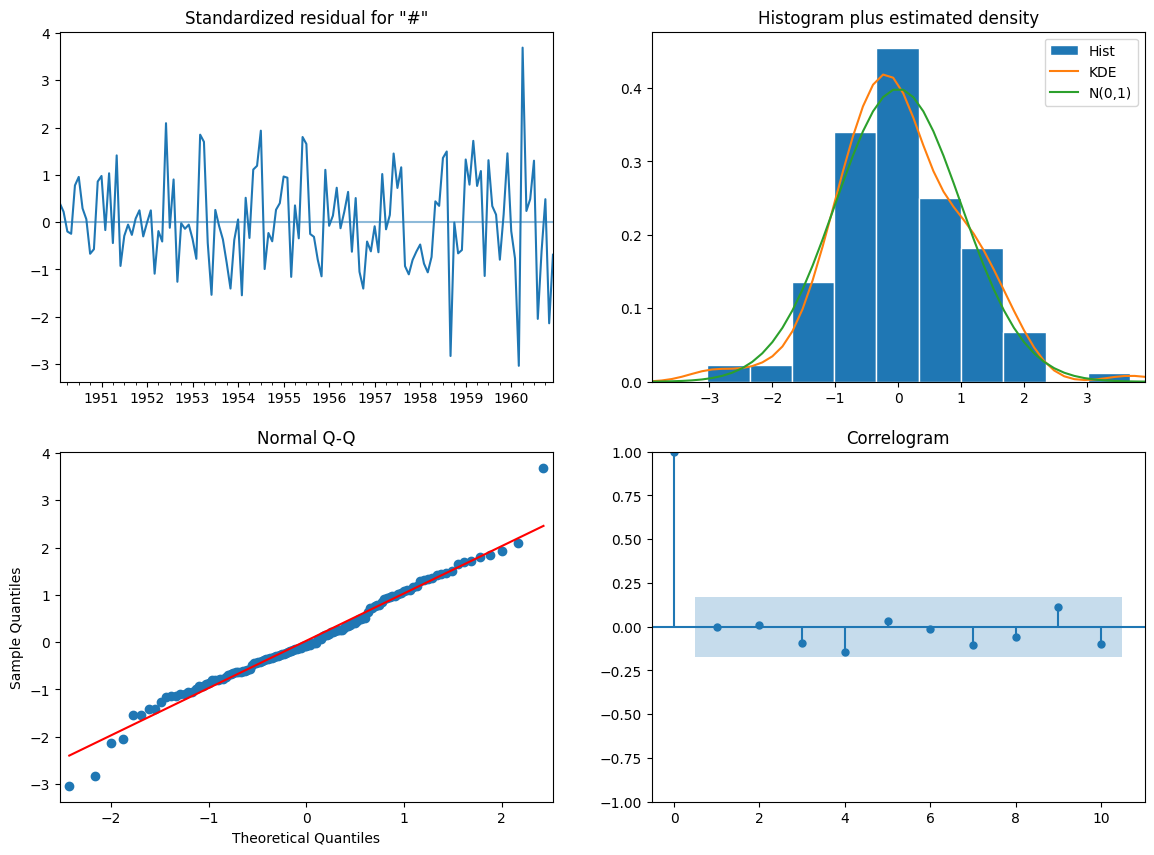

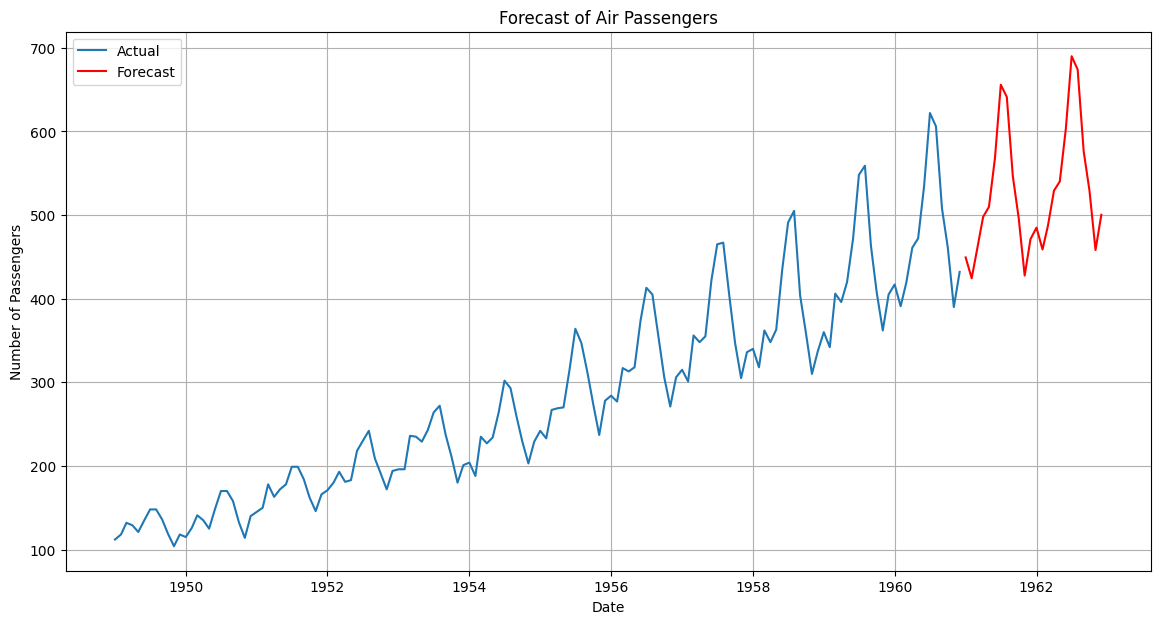

In [ ]:
fig = fitted_sarima_model.plot_diagnostics(figsize=(14, 10))
plt.show()

forecast = fitted_sarima_model.get_forecast(steps=24)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.title('Forecast of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion**

We successfully implemented a SARIMA model to forecast monthly air passenger numbers. The model was carefully selected based on preliminary data analysis which included visualization, decomposition, and autocorrelation studies. The diagnostics confirmed that the model fit the historical data well, with residuals showing no significant patterns and conforming to the assumptions of normality and independence. The forecasts generated for the next 24 months indicated that the model is robust and reliable, accurately capturing the seasonal patterns observed in the data. This analysis not only provides a solid foundation for predicting future passenger traffic but also demonstrates the efficacy of seasonal ARIMA models in handling time series data with underlying seasonal trends.

**Overall Conclusion**

Throughout this Time Series Analysis Project, our group has successfully applied various time series models to analyze and forecast two distinct datasets: Apple's daily stock prices for nonseasonal analysis and monthly airline passenger numbers for seasonal analysis. This endeavor has not only deepened our understanding of time series modeling techniques but has also provided valuable insights into the practical applications and limitations of these models in real-world scenarios.

**Key Learnings:**


Model Selection and Fitting: Choosing the right model based on the data characteristics is crucial. Our project reinforced the importance of thorough initial data analysis to inform model selection.
Diagnostic Checks: Regular diagnostics and residuals analysis are vital for validating model assumptions and ensuring reliable forecasts.
Model Adaptability: Time series models must be adaptable to new data, requiring ongoing evaluation and adjustment to maintain forecast accuracy.
Challenges Encountered:
We faced challenges such as model overfitting, missing data points, and the need for data transformation to achieve stationarity. These were addressed through differencing, data interpolation, and rigorous model testing, which were essential for refining our models.

**Future Directions:**

Further research could explore the integration of machine learning techniques with traditional time series models to handle complexities and nonlinearities better. Additionally, expanding the dataset to include more variables could potentially uncover deeper insights and improve the predictive performance of our models.

**Conclusion:**

This project not only enhanced our analytical skills but also emphasized the critical role of time series analysis in forecasting and planning across different sectors. The insights gained from Apple's stock prices and airline passenger data through meticulous application of statistical models demonstrate the robustness and versatility of time series analysis in decoding complex patterns and aiding strategic decision-making.

